In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np



In [11]:
fileName = '2AHHF06'

dfINPE = pd.read_csv('Pontos\\'+fileName+'.txt', skiprows=12, names=['ABS_Ant', 'PHA_Ant', 'ABS_Ref', 'PHA_Ref', 'E'])
dfINPE = dfINPE.iloc[:-1, :-1]
dfINPE['ABS_Ant'] = pd.to_numeric(dfINPE['ABS_Ant'], errors='coerce')
# dfINPE['POSr'] = np.radians(range(360+alphaINPE, 0+alphaINPE,-1))
config = pd.read_csv('Pontos\\'+fileName+'.txt', skiprows=2, nrows=3, names = ['#','npts', 'start', 'stop', 'roll', 'direction','0']).iloc[0]

stepROLL = -1 if config['direction']== 'REVERSE'else 1
alpha = 0
dfINPE['POS'] = range(int(config['start'])+alpha,int(config['stop'])+alpha+stepROLL, stepROLL)
# dfINPE.loc[dfINPE['POS'] < 0, 'POS'] += 360

# dfINPE = dfINPE.sort_values(by= 'POS', ascending=True)
dfINPE['POSr'] = np.radians(range(int(config['start'])+alpha,int(config['stop'])+alpha+stepROLL, stepROLL))
# dfINPE ['POSr'] = np.radians(dfINPE['POS'])
dfINPE

,ABS_Ant,PHA_Ant,ABS_Ref,PHA_Ref,POS,POSr
0,-55.094,-141.6867,-38.969,-111.4367,180,3.141593
1,-55.074,-143.2579,-38.974,-111.4394,179,3.124139
2,-55.063,-144.8203,-38.964,-111.4385,178,3.106686
3,-55.065,-146.2396,-38.988,-111.4219,177,3.089233
4,-55.059,-147.6816,-38.979,-111.4329,176,3.071779
...,...,...,...,...,...,...
355,-55.235,-136.5516,-38.932,-111.4389,-175,-3.054326
356,-55.174,-137.6681,-38.949,-111.4604,-176,-3.071779
357,-55.134,-139.0370,-38.950,-111.4501,-177,-3.089233
358,-55.086,-140.1281,-38.969,-111.4736,-178,-3.106686


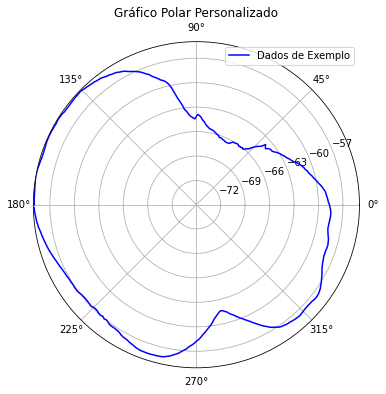

In [12]:
angulos_marcas = np.deg2rad(90)


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='polar')
ax.plot(dfINPE['POSr'], dfINPE['ABS_Ant'], label='Dados de Exemplo', color='blue')
plt.yticks(range(round(max(dfINPE['ABS_Ant'])-20), round(max(dfINPE['ABS_Ant'])), 3))

# ax.set_xticks(angulos_marcas)
ax.set(ylim=(max(dfINPE['ABS_Ant'])-20, max(dfINPE['ABS_Ant'])))
ax.set_title('Gráfico Polar Personalizado')
ax.legend()
plt.show()

In [1]:
# Nome do arquivo que você deseja criar
nome_arquivo = "novo_arquivo.txt"

# Abrir o arquivo em modo de escrita ("w")
with open(nome_arquivo, "w") as arquivo:
    # Escrever algum conteúdo no arquivo
    arquivo.write("Este é o conteúdo do novo arquivo.\n")
    arquivo.write("Você pode adicionar mais linhas conforme necessário.\n")

# O arquivo é automaticamente fechado quando o bloco "with" é concluído


In [56]:
freq = 'F07'
freqInt= int(freq[-2:])*10**9

gHorn = pd.read_excel('Ganho.xlsx', sheet_name='AGP')
fgHorn = gHorn.loc[gHorn['ID']== freq, 'Ganho [dBi]']

prG = pd.read_csv('PR\\Cabo_Gore.prn',skiprows=1)
prG = prG.iloc[:, :-1]

prH = pd.read_csv('PR\\Cabo_Huber.prn',skiprows=1)
prH = prH.iloc[:, :-1]

fprG = prG.loc[prG['Frequency (Hz)']== freqInt, 'dB']
fprH = prH.loc[prH['Frequency (Hz)']== freqInt, 'dB']

float(fgHorn)


21.6

In [5]:
from main import read_CST, read_INPE

dfINPE = read_INPE('2AVHF06', 0)
dfCST = read_CST('2AVHF06', -90)

# dfCST.to_excel('CST.xlsx',sheet_name='CST')
# dfINPE.to_excel('INPE.xlsx', sheet_name='INPE')

dfCST.head(91)



,Theta [deg.],Phi [deg.],Abs(Grlz)[dBi],Abs(Theta)[dBi],Phase(Theta)[deg.],Abs(Phi)[dBi],Phase(Phi)[deg.],Ax.Ratio[dB],POSr
0,90.0,0.0,-5.449,-16.66,167.912,-5.791,261.949,10.900,-1.570796
1,90.0,1.0,-6.046,-16.55,167.414,-6.451,263.493,10.150,-1.553343
2,90.0,2.0,-6.673,-16.43,166.915,-7.158,265.355,9.391,-1.535890
3,90.0,3.0,-7.328,-16.31,166.415,-7.914,267.614,8.622,-1.518436
4,90.0,4.0,-8.006,-16.20,165.916,-8.720,270.374,7.874,-1.500983
...,...,...,...,...,...,...,...,...,...
86,90.0,86.0,-9.712,-10.38,141.670,-18.190,38.928,8.108,-0.069813
87,90.0,87.0,-9.981,-10.37,141.649,-20.640,38.763,10.530,-0.052360
88,90.0,88.0,-10.190,-10.37,141.633,-24.080,38.437,13.970,-0.034907
89,90.0,89.0,-10.310,-10.36,141.623,-29.890,37.485,19.800,-0.017453


In [2]:
import pandas as pd

from main import correlation

dfCST = pd.read_excel('dois.xlsx', sheet_name= 'CST')
dfINPE = pd.read_excel('dois.xlsx', sheet_name= 'INPE')

p, k, s = correlation(dfCST, 'Norm', dfINPE, 'Norm')

print (p, k, s)

0.6468218282929549 0.42453414226459485 0.5183246844236807
